In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import argparse
import os

## Util functions

In [3]:
def set_plotting_settings():
    """Set matplotlib settings for better visualizations"""
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12

def load_activations(file_path):
    """Load activation data from .npy file"""
    try:
        activations = np.load(file_path)
        print(f"Loaded activations with shape: {activations.shape}")
        return activations
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def plot_pca_comparison(activations1, activations2, n_components=2, labels=None, title="PCA Comparison of Activations", output_file="pca_comparison.png"):
    """
    Plot PCA comparison of two sets of activations
    
    Args:
        activations1: First set of activations (numpy array)
        activations2: Second set of activations (numpy array)
        n_components: Number of PCA components to use
        labels: Labels for the two datasets
        title: Plot title
        output_file: Output file path
    """
    # Set plotting settings
    set_plotting_settings()
    
    # Combine activations for PCA fitting
    combined_activations = np.vstack([activations1, activations2])
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca.fit(combined_activations)
    
    # Transform data
    activations1_pca = pca.transform(activations1)
    activations2_pca = pca.transform(activations2)
    
    # Create figure
    plt.figure(figsize=(10, 8))
    
    # Plot the first two components if n_components >= 2
    if n_components >= 2:
        # Plot activations1 points
        plt.scatter(
            activations1_pca[:, 0], 
            activations1_pca[:, 1], 
            color='blue', 
            alpha=0.6, 
            label=labels[0] if labels else "Activations 1"
        )
        
        # Plot activations2 points
        plt.scatter(
            activations2_pca[:, 0], 
            activations2_pca[:, 1], 
            color='red', 
            alpha=0.6, 
            label=labels[1] if labels else "Activations 2"
        )
        
        # Calculate and print explained variance
        explained_variance = pca.explained_variance_ratio_[:n_components]
        print(f"Explained variance ratio: {explained_variance}")
        print(f"Total explained variance: {sum(explained_variance):.4f}")
        
        # Add explained variance to axis labels
        plt.xlabel(f'PC 1 ({explained_variance[0]:.2%} variance)')
        plt.ylabel(f'PC 2 ({explained_variance[1]:.2%} variance)')
        
        # Add title and legend
        plt.title(title)
        plt.legend()
        
        # Add grid
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Save figure
        plt.tight_layout()
        plt.savefig(output_file, dpi=300)
        print(f"Saved PCA plot to {output_file}")
        
        # Display figure
        plt.show()
        
        return {
            "pca": pca,
            "activations1_pca": activations1_pca,
            "activations2_pca": activations2_pca,
            "explained_variance": explained_variance
        }
    else:
        print("Need at least 2 components to create a 2D plot")
        return None

def analyze_pca_components(pca, n_top_features=10):
    """
    Analyze what features contribute most to each principal component
    
    Args:
        pca: Fitted PCA object
        n_top_features: Number of top features to show
    """
    feature_importance = {}
    
    for i, component in enumerate(pca.components_):
        # Get the indices of the n_top_features with the largest absolute values
        sorted_indices = np.argsort(np.abs(component))[::-1]
        top_indices = sorted_indices[:n_top_features]
        
        # Store the feature indices and their importance scores
        feature_importance[f"PC{i+1}"] = [(idx, component[idx]) for idx in top_indices]
        
        print(f"\nTop features for PC{i+1}:")
        for idx, value in feature_importance[f"PC{i+1}"]:
            print(f"  Feature {idx}: {value:.4f}")
    
    return feature_importance

Loaded activations with shape: (62, 4096)
Loaded activations with shape: (62, 4096)
Explained variance ratio: [0.08465507 0.06613616]
Total explained variance: 0.1508
Saved PCA plot to ../figures/pca_15_activations.png


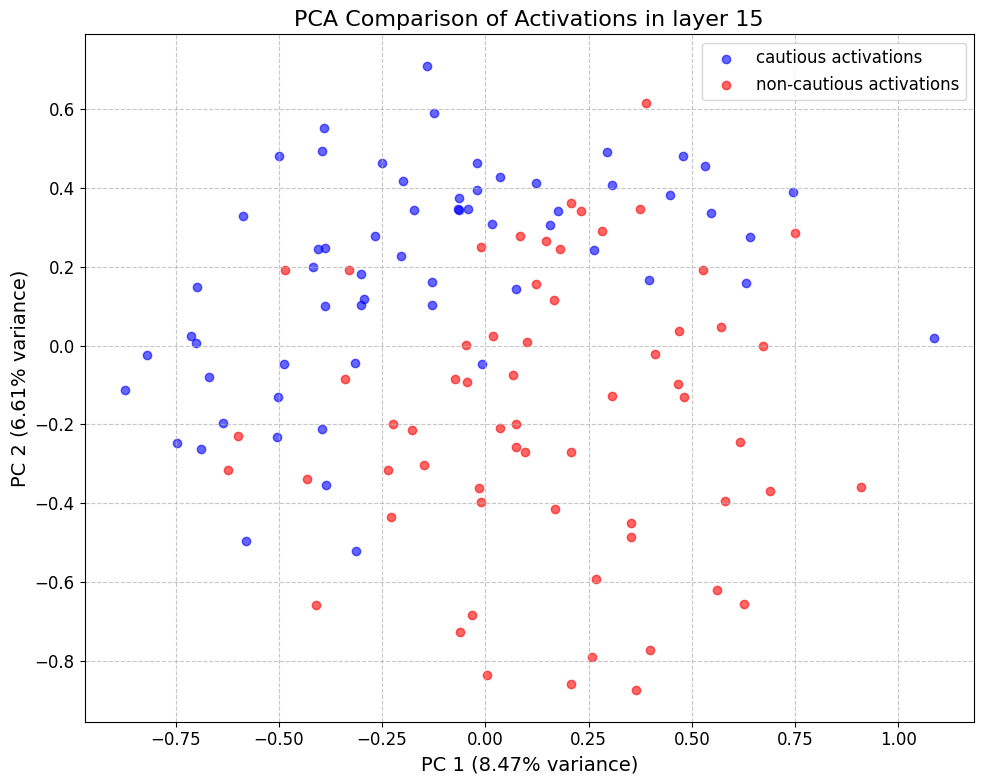


Top features for PC1:
  Feature 2742: 0.1962
  Feature 1298: -0.1691
  Feature 1189: -0.1620
  Feature 1800: -0.1517
  Feature 1805: -0.1309
  Feature 2352: 0.1261
  Feature 2692: 0.1174
  Feature 1039: 0.1128
  Feature 2613: -0.1119
  Feature 133: -0.1111

Top features for PC2:
  Feature 2629: 0.2357
  Feature 325: -0.1510
  Feature 2692: 0.1434
  Feature 866: -0.1365
  Feature 2040: -0.1361
  Feature 291: 0.1069
  Feature 1565: -0.1009
  Feature 2824: -0.0941
  Feature 1656: 0.0932
  Feature 3585: -0.0889
Loaded activations with shape: (62, 4096)
Loaded activations with shape: (62, 4096)
Explained variance ratio: [0.08217705 0.06302986]
Total explained variance: 0.1452
Saved PCA plot to ../figures/pca_19_activations.png


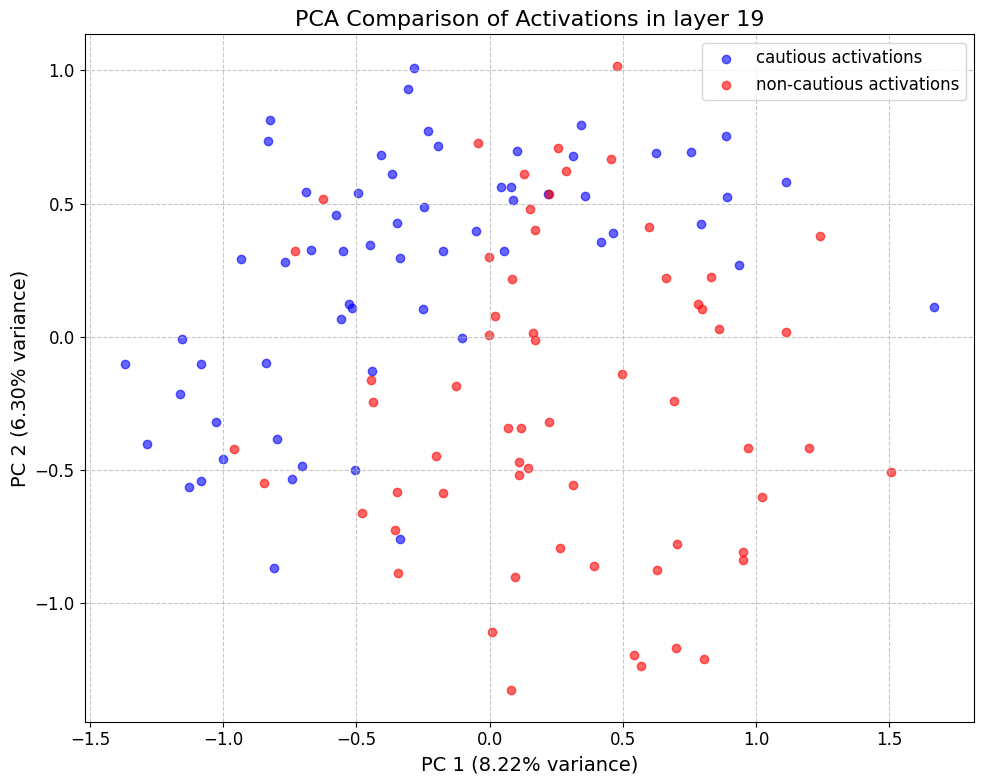


Top features for PC1:
  Feature 2742: 0.2270
  Feature 1805: -0.1463
  Feature 1800: -0.1346
  Feature 1298: -0.1270
  Feature 2613: -0.1182
  Feature 568: -0.1127
  Feature 1189: -0.1013
  Feature 2352: 0.1008
  Feature 4080: -0.0987
  Feature 2506: 0.0906

Top features for PC2:
  Feature 2629: 0.1890
  Feature 325: -0.1559
  Feature 2692: 0.1256
  Feature 2040: -0.1193
  Feature 568: -0.1138
  Feature 2088: 0.1084
  Feature 4062: 0.1046
  Feature 4055: -0.1039
  Feature 1656: 0.1022
  Feature 2352: 0.0939
Loaded activations with shape: (62, 4096)
Loaded activations with shape: (62, 4096)
Explained variance ratio: [0.08327624 0.06258614]
Total explained variance: 0.1459
Saved PCA plot to ../figures/pca_23_activations.png


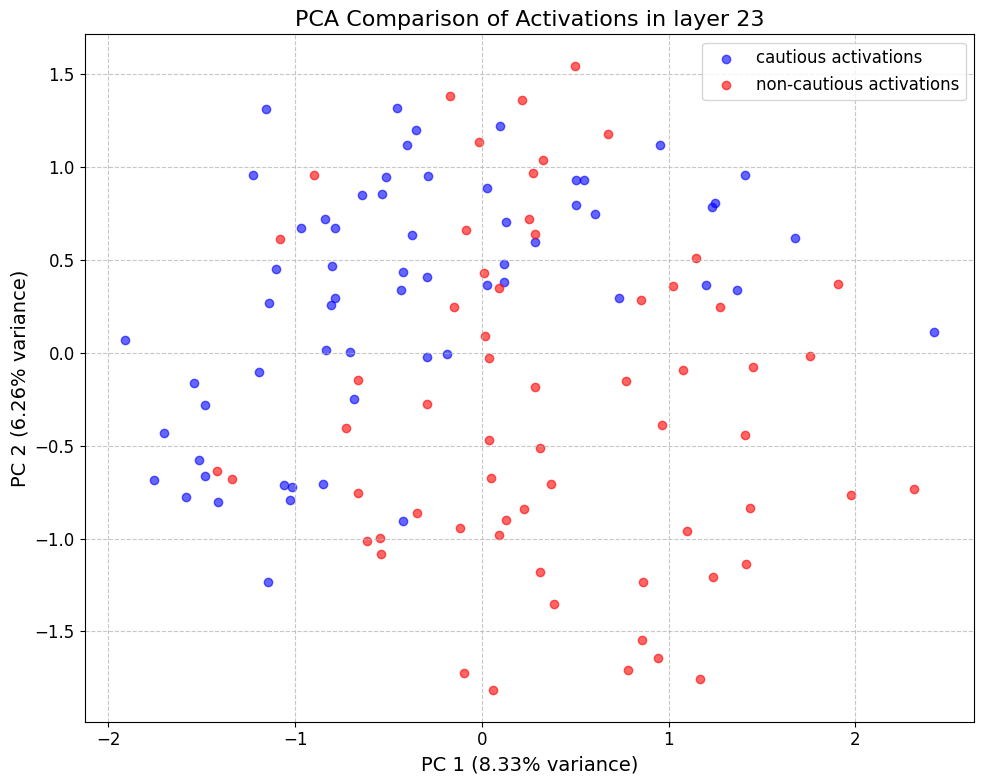


Top features for PC1:
  Feature 2742: 0.2604
  Feature 1805: -0.1564
  Feature 4080: -0.1437
  Feature 2613: -0.1301
  Feature 1800: -0.1163
  Feature 568: -0.1159
  Feature 1298: -0.1111
  Feature 504: -0.1000
  Feature 2352: 0.0953
  Feature 1658: 0.0946

Top features for PC2:
  Feature 2629: 0.1930
  Feature 325: -0.1712
  Feature 4062: 0.1337
  Feature 2088: 0.1220
  Feature 568: -0.1186
  Feature 2040: -0.1059
  Feature 2692: 0.1054
  Feature 1805: 0.1012
  Feature 2352: 0.0928
  Feature 1951: -0.0865
Loaded activations with shape: (62, 4096)
Loaded activations with shape: (62, 4096)
Explained variance ratio: [0.08391614 0.06082362]
Total explained variance: 0.1447
Saved PCA plot to ../figures/pca_27_activations.png


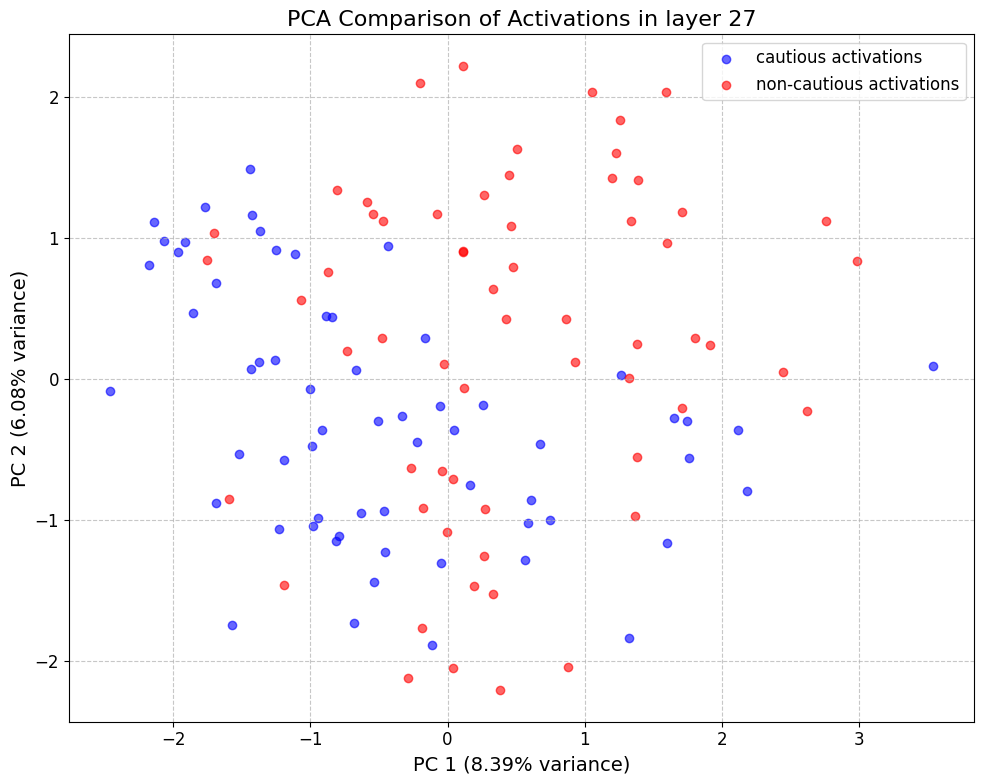


Top features for PC1:
  Feature 2742: 0.2592
  Feature 2352: 0.1546
  Feature 1805: -0.1419
  Feature 4080: -0.1419
  Feature 504: -0.1292
  Feature 2613: -0.1255
  Feature 1298: -0.1016
  Feature 1800: -0.0982
  Feature 568: -0.0963
  Feature 2506: 0.0816

Top features for PC2:
  Feature 325: 0.1570
  Feature 2629: -0.1562
  Feature 402: -0.1357
  Feature 4062: -0.1274
  Feature 2088: -0.1203
  Feature 568: 0.1040
  Feature 2692: -0.0918
  Feature 1805: -0.0857
  Feature 2040: 0.0803
  Feature 2082: -0.0803
Loaded activations with shape: (62, 4096)
Loaded activations with shape: (62, 4096)
Explained variance ratio: [0.09782771 0.06973791]
Total explained variance: 0.1676
Saved PCA plot to ../figures/pca_31_activations.png


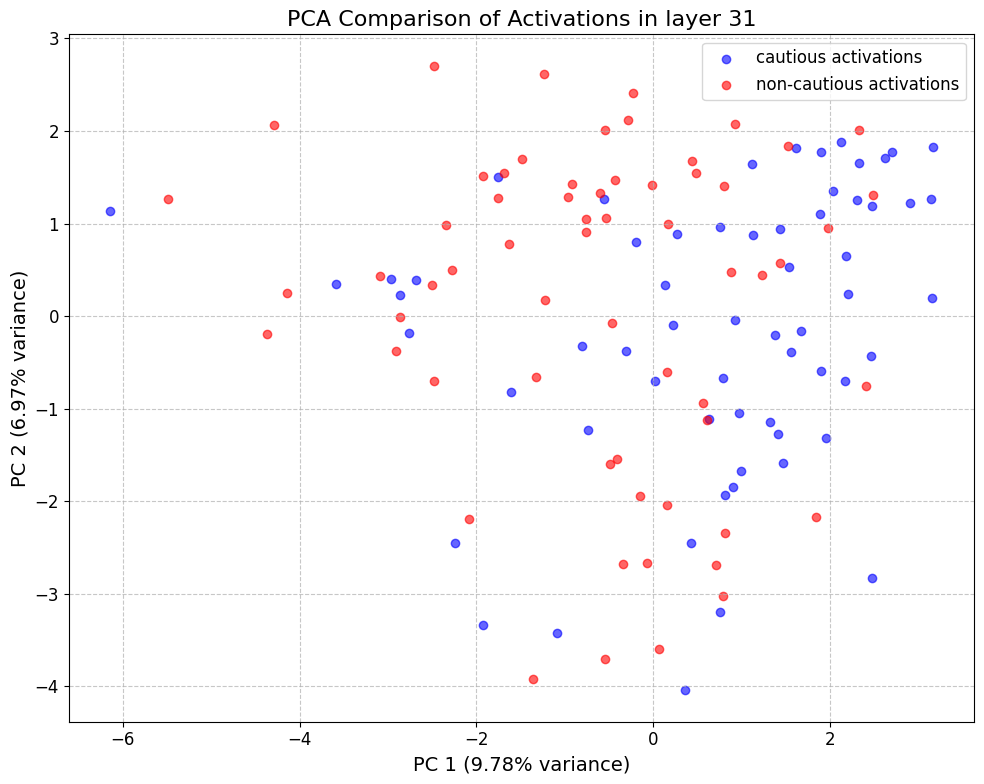


Top features for PC1:
  Feature 3026: 0.1663
  Feature 2742: -0.1645
  Feature 504: 0.1608
  Feature 4080: 0.1320
  Feature 2613: 0.1137
  Feature 2352: -0.1135
  Feature 3118: -0.1116
  Feature 1344: 0.1062
  Feature 320: 0.1055
  Feature 1805: 0.1050

Top features for PC2:
  Feature 2352: 0.1444
  Feature 2929: 0.1322
  Feature 402: -0.1320
  Feature 4080: 0.1171
  Feature 325: 0.1116
  Feature 2629: -0.1051
  Feature 1917: -0.0945
  Feature 2613: -0.0838
  Feature 1344: 0.0814
  Feature 2088: -0.0752


In [9]:
def main():
    ndims = 2
    layers = [15,19,23,27,31]
    labels = ["cautious activations", "non-cautious activations"]
    activations_dir = "../activations/"
    output_dir = "../figures/"
    
    for layer in layers:
        # Load activations
        activations_cautious = load_activations(os.path.join(activations_dir, f"deepseek_layer_{layer}_cautious_activations.npy"))
        activations_noncautious = load_activations(os.path.join(activations_dir, f"deepseek_layer_{layer}_noncautious_activations.npy"))
        
        if activations_cautious is None or activations_noncautious is None:
            print("Failed to load one or both activation files. Exiting.")
            return
        
        # Check dimensions
        if activations_cautious.shape != activations_noncautious.shape:
            print(f"Warning: Activation shapes don't match - {activations_cautious.shape} vs {activations_noncautious.shape}")
        
        # Plot PCA comparison
        result = plot_pca_comparison(
            activations_cautious, 
            activations_noncautious, 
            n_components=ndims,
            labels=labels,
            title=f"PCA Comparison of Activations in layer {layer}",
            output_file=os.path.join(output_dir, f"pca_{layer}_activations.png")
        )
        
        # Analyze PCA components if requested
        if result:
            analyze_pca_components(result["pca"])

main()